# Auction Data Exercise

##### Purpose
In this notebook we explore some basic questions about auctions-purchases by calculating the metrics across various dimensions in the dataset, as well as attempting to relate how succesful sales affect further purchases by the users.

##### Using this notebook
To allow for future reproducibility, this notebook contains all the logic used to process and analyze the data. The analysis can be re run by downloading the notebook the csv file. 
Contact me if you have any questions, would like the csv, or need help reproducing the results.

# Table of Contents


1. [First exploration of the auction dataset](#intro)

    1.1 [Import the data](#import)
    
    1.2 [Basic Stats](#basicstats)
    
    1.3 [Correlations](#correlations)
    
    1.4 [Expensive products](#expensive)
    
    1.5 [Users and products](#usersproducts)
    
    1.6 [Buy vs Selling values](#buysellvalue)
    

2. [Initial Exploration on purchases](#exploration)

    2.1 [Outliers](#outliers)
    
    2.2 [KPI definitions](#kpi)
        
      2.2.1 [Nominal count-based definition of  KPIs](#nominalcount)
      
      2.2.2 [Nominal value-based definition of KPIs](#nominalvalue)
   
   2.3 [Auction success and subsequent purchases](#auctionsuccess)

    2.3.1 [Conversion rates across buyer segments](#buyersegment)
   
    2.3.2 [Price percentile vs conversion](#pricepercentile)
   
    2.3.3 [Starting price vs final price](#startfinalprice)
   
3.[Conclusions](#conclusions)

In [ ]:
# python imports and matplotlib config

# python imports
import datetime as dt
import sys
sys.path
sys.path.append('/Users/Documents/Auction dataset/dataset.csv')
import pandas

# analysis imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# juypyter config
%matplotlib inline
#%load_ext sql
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pandas config
pd.set_option('float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 200)

# customize css of bootstrap alert boxes
from IPython.display import HTML
style = """
        <style>
            div.alert-warning, div.alert-info {
                font-size: 1.2em;
                line-spacing: 140%;
                max-width: 1000px;
            }
        </style>
        """
HTML(style)

# First exploration of the Auction dataset <a id=intro><a>

### Import the data <a id=import></a>

In [17]:
# Read csv
dataset = pandas.read_csv("/Users/Documents/Auction dataset/dataset.csv", sep=',', low_memory=False)



In [18]:
dataset.head()

,buyer_group,product_group,duration_of_auction,price_start,bids,first_3_day_bids,last_3_day_bids,price_final,final_price_percentile,last_8_day_searches,last_8_day_item_views,last_8_day_purchases,last_3_day_searches,last_3_day_item_views,last_3_day_purchases,after_8_day_value,after_8_day_purchases,us_id
0,category_2,ecae5ffc4d46941926c73792ab07cd0f,7,42.500,13,2,4,75,0.800,1,1,1,1,1,1,1.000,1,b2720f9945eea977f6fca4822ba4d80f
1,category_2,ecae5ffc4d46941926c73792ab07cd0f,7,37.000,4,1,2,41,0.629,1,2,1,1,1,1,1.000,1,b2720f9945eea977f6fca4822ba4d80f
2,category_2,7d9930254a21521414d18f79e3b7162b,7,84.000,4,1,4,85,0.344,1,3,1,1,1,1,1.000,1,b2720f9945eea977f6fca4822ba4d80f
3,category_2,7d9930254a21521414d18f79e3b7162b,7,84.000,8,1,8,91,0.362,1,3,1,1,1,1,1.000,1,b2720f9945eea977f6fca4822ba4d80f
4,category_4,7bae1e0d716ce7d0717b2046aecdd6a3,3,57.000,24,10,23,92,0.954,9,1,1,1,1,1,1.000,1,e9b617e2f8c597ba0a169dff4f5c05be


## Basic statistics <a id=basicstats></a>

In [19]:
dataset.describe()

,duration_of_auction,price_start,bids,first_3_day_bids,last_3_day_bids,price_final,final_price_percentile,last_8_day_searches,last_8_day_item_views,last_8_day_purchases,last_3_day_searches,last_3_day_item_views,last_3_day_purchases,after_8_day_value,after_8_day_purchases
count,695730.000,695730.000,695730.000,695730.000,695730.000,695730.000,695730.000,695730.000,695730.000,695730.000,695730.000,695730.000,695730.000,695730.000,695730.000
mean,6.525,49.807,7.537,2.833,5.406,83.071,0.552,8.431,33.364,1.209,2.740,9.128,1.055,10.413,1.206
std,1.564,194.311,8.349,4.597,5.659,300.823,0.312,30.610,93.542,1.730,11.523,28.899,0.652,168.850,2.125
min,1.000,1.010,2.000,1.000,1.000,2.000,-0.005,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,7.000,5.000,2.000,1.000,2.000,11.000,0.283,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000
50%,7.000,12.990,4.000,1.000,3.000,25.000,0.595,1.000,6.000,1.000,1.000,1.000,1.000,1.000,1.000
75%,7.000,36.000,10.000,2.000,7.000,66.000,0.835,4.000,26.000,1.000,1.000,5.000,1.000,1.000,1.000
max,10.000,32001.000,450.000,133.000,159.000,34101.000,1.004,2705.000,5572.000,349.000,2188.000,1737.000,145.000,59951.000,900.000


For the variable 'price_start' the median is far lower than the mean, suggesting a skewed distribution leaning left.
Let's quickly check the histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117b6e400>]],
      dtype=object)

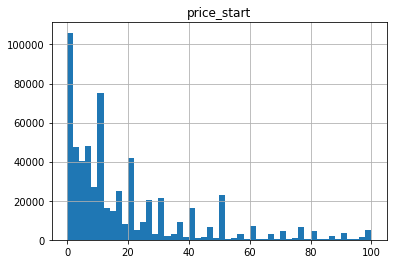

In [22]:
dataset.hist(column='price_start',bins=50, range=[0,100])

- Similarly with the bids columns, the distribution will lean to the left.  Thinking ahead, this may help us categorize the products, e.g. two buckets 'popular' and 'unpopular' choosing a low threshold to separate the two.

- Medians showing a zero value already tell us that most rows have a zero (last_8_day_searches, purchases, etc.).  We will look at conversions later on.

- Prices, bids, views, searches and purchases all show a high difference between the 75% and the max.  We might need to remove some outliers.

## Correlations <a id=correlations></a>

In [23]:
correlation_matrix=dataset.corr()
correlation_matrix

,duration_of_auction,price_start,bids,first_3_day_bids,last_3_day_bids,price_final,final_price_percentile,last_8_day_searches,last_8_day_item_views,last_8_day_purchases,last_3_day_searches,last_3_day_item_views,last_3_day_purchases,after_8_day_value,after_8_day_purchases
duration_of_auction,1.000,-0.028,-0.068,-0.229,-0.174,-0.031,-0.068,-0.033,-0.061,-0.018,-0.030,-0.070,-0.012,-0.013,-0.010
price_start,-0.028,1.000,-0.013,-0.020,0.007,0.742,0.198,-0.002,-0.016,-0.014,0.000,-0.013,-0.010,0.013,-0.012
bids,-0.068,-0.013,1.000,0.735,0.839,0.204,0.321,0.019,0.029,-0.002,0.013,0.029,-0.001,0.022,0.001
first_3_day_bids,-0.229,-0.020,0.735,1.000,0.459,0.188,0.225,0.020,0.039,0.003,0.018,0.043,0.004,0.024,0.004
last_3_day_bids,-0.174,0.007,0.839,0.459,1.000,0.153,0.282,0.016,0.026,-0.002,0.014,0.032,-0.001,0.019,0.001
price_final,-0.031,0.742,0.204,0.188,0.153,1.000,0.230,0.006,-0.005,-0.012,0.006,-0.003,-0.008,0.023,-0.008
final_price_percentile,-0.068,0.198,0.321,0.225,0.282,0.230,1.000,0.027,0.012,-0.005,0.020,0.013,-0.003,0.019,0.002
last_8_day_searches,-0.033,-0.002,0.019,0.020,0.016,0.006,0.027,1.000,0.301,0.194,0.814,0.263,0.138,0.077,0.145
last_8_day_item_views,-0.061,-0.016,0.029,0.039,0.026,-0.005,0.012,0.301,1.000,0.440,0.213,0.886,0.340,0.117,0.299
last_8_day_purchases,-0.018,-0.014,-0.002,0.003,-0.002,-0.012,-0.005,0.194,0.440,1.000,0.136,0.387,0.775,0.133,0.581


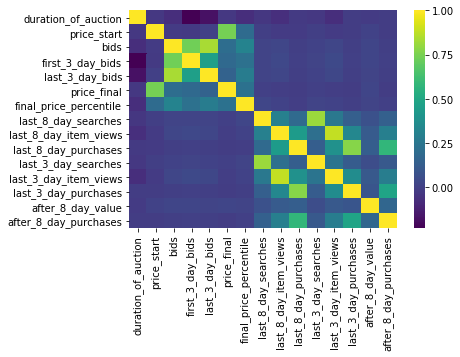

In [24]:
sns.heatmap(correlation_matrix, cmap='viridis')

Nothing too surprising if we think about the variables involved.  Regarding start and final price, we can check if the *difference* or *percentage increase* of these has a positive correlation with later on purchases.

In [25]:
#Let's add the percentage increase column and check correlations again
dataset['percentage_increase'] = (dataset['price_final']-dataset['price_start'])/dataset['price_start']

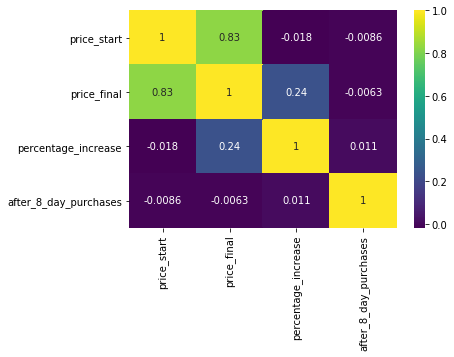

In [27]:
# If we look only at starting prices higher than near zero (which I suspect might be some sort of default) we see a 
# very slight improvement, although this is a bit too much guess-work.
sns.heatmap(dataset[['price_start','price_final','percentage_increase','after_8_day_purchases']][(dataset.price_start>=5)].corr(), cmap='viridis',annot=True)

### Expensive products <a id=expensive><a/>
Do high value products belong to a certain category?

In [29]:
dataset.groupby('product_group')['price_start'].agg(['mean','count']).sort_values(by='mean' ,ascending=False)

,mean,count
product_group,,
07549d0c93659f42b75b56f1a0c1f962,6365.625,8
7a76931c74abeb9d24da45439ac0a978,5834.333,3
338eee9a0a096ea0bbd07413a093dd34,5517.998,6
812dad276cb73ec449211a98fa336e7b,3938.500,4
b6a6955552fd8c72bdcdf42d61479ab8,3500.000,1
e023d440feae1f346908868ac69f2123,3484.549,20
8f24386a8b16fb2d39cf8f86f2df42d8,3388.747,4
ce16186e278fdbda35682c14b8279f48,3167.667,3
3a663931df56860e9c9232368a0d6dc2,2901.000,1


Some products are definitely expensive.  This can skew some of the metrics we will define later.  Grouping products in buckets is an option to consider.  We can do this by price, but we could also consider other variables like bids and purchases and run an unsupervised learning algorithm to cluster them.

Note: The cluster approach, if we want to use the labels as predictor variables for a classification problem, can carry problems regarding the labels in the test set.

### Users and products <a id=usersproducts></a>
Are frequent users mainly focused on few products or spread along many?


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a233f5668>]],
      dtype=object)

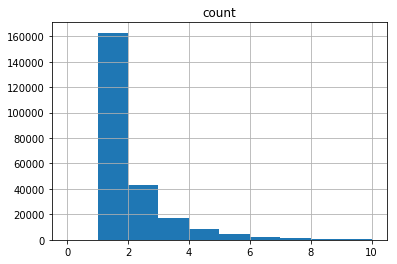

In [30]:
user_product = dataset.groupby('us_id')['product_group'].nunique().reset_index(name='count')
user_product.hist(column='count',bins=10, range=[0,10])

### Buy vs Selling values <a id=buysellvalue></a>

Let's check the basic statistics of the difference between values of purchased (after_7d) and sold products:

In [31]:
(dataset.after_8_day_value-dataset.price_final).describe()

count   695730.000
mean       -72.658
std        341.610
min     -34100.000
25%        -61.000
50%        -22.000
75%         -8.000
max      59900.000
dtype: float64

The negative percentiles were expected, but let's see how buyer segments differ

In [33]:
dataset['value_price_diff'] = dataset.after_8_day_value-dataset.price_final
dataset.groupby('buyer_group')['value_price_diff'].agg(['mean','median'])

,mean,median
buyer_group,,
category_1,-106.117,-41.000
category_2,-86.548,-31.000
category_3,-42.108,-16.000
category_4,-123.281,-39.000
category_5,-67.497,-22.000
category_6,-47.204,-15.505


This one is interesting, it's mid categories that have the smallest difference.

# Initial Exploration on purchases <a id=exploration></a>

### Outliers <a id=outliers></a>

TBD

## KPI Definitions <a id=kpi></a>

### Nominal count-based definition of  KPIs <a id=nominalcount></a>
As a starting point we can define the following KPI's.  Item views and searches will not be used to construct a ratio as I suspect that a view can happen without a search (would need to check the precise definition and data to take this further, e.g. an indicator of a purchase or view that comes from a search).
$$
\text{PUR} = 
\underbrace{
  \overbrace{
    \frac{\strut \text{# Purchases}}{\text{# Searches}}
  }^{\strut PSR}
  \times \overbrace{
    \frac{\strut \text{# Searches}}{\text{# Users}}
  }^{\strut SUR}}
_{\strut PUR}
$$

$$
\text{PUR} = 
\underbrace{
  \overbrace{
    \frac{\strut \text{# Purchases}}{\text{# Views}}
  }^{\strut PVR}
  \times \overbrace{
    \frac{\strut \text{# Views}}{\text{# Users}}
  }^{\strut VUR}}
_{\strut PUR}
$$

Although there is plenty to explore regarding the 3d and 8d components of these metrics we will try to keep this simple (following the KISS principle), so for the purpose of this section we will focus on the purchases "after 8 days" and "3 days before", paired with number of users and **searches for the last 8 days** before auction ended.

### Nominal value-based definition of KPIs  <a id=nominalvalue></a>
These ratios are calculated based on euro-value of purchases, which gives higher weight to larger and more valuable purchases.

$$
\text{ € PUR} = 
\underbrace{
  \overbrace{
    \frac{\strut \text{€ Purchases}}{\text{# Searches}}
  }^{\strut € PSR}
  \times \overbrace{
    \frac{\strut \text{# Searches}}{\text{# Users}}
  }^{\strut SUR}}
_{\strut € PUR}
$$

## Auction success and subsequent purchases

### Conversion rates across buyer segments <a id= buyersegment> </a> 

We can see, as expected according to the naming of the cohorts, that conversion rates go from high to low.
Number of users is included here in order to be sure that sample sizes are big enough to be representative.  We will not deal with confidence intervals and hypothesis testing here, although there are some group pairs that might be close calls.

In [35]:
def after_8d_UPR(df_sub):
    return df_sub['after_8_day_purchases'].sum() / float(df_sub['us_id'].nunique())
def last_3d_UPR(df_sub):
    return df_sub['last_3_day_purchases'].sum() / float(df_sub['us_id'].nunique())
def after_8d_SPR(df_sub):
    return df_sub['after_8_day_purchases'].sum() / float(df_sub['last_8_day_searches'].sum())
def last_3d_SPR(df_sub):
    return df_sub['last_3_day_purchases'].sum() / float(df_sub['last_8_day_searches'].sum())
def first_5d_SPR(df_sub):
    return (df_sub['last_8_day_purchases'].sum() - df_sub['last_3_day_purchases'].sum())/ (float(df_sub['last_8_day_searches'].sum())-float(df_sub['last_3_day_searches'].sum()))

def f(x):
    d = {}
    d['after_8d_UPR'] = after_8d_UPR(x)
    d['last_3d_UPR'] = last_3d_UPR(x)
    d['after_8d_SPR'] = after_8d_SPR(x)
    d['last_3d_SPR'] = last_3d_SPR(x)
    d['first_5d_SPR'] = first_5d_SPR(x)
    d['users'] = x['us_id'].nunique()
    return pd.Series(d, index=['after_8d_UPR','last_3d_UPR','after_8d_SPR','last_3d_SPR','first_5d_SPR','users'])


dataset.groupby('buyer_group').apply(f)

,after_8d_UPR,last_3d_UPR,after_8d_SPR,last_3d_SPR,first_5d_SPR,users
buyer_group,,,,,,
category_1,5.957,4.032,0.089,0.060,0.043,8909.000
category_2,4.183,3.259,0.111,0.086,0.035,30286.000
category_3,4.233,3.417,0.137,0.111,0.039,59017.000
category_4,2.686,2.590,0.162,0.157,0.010,56529.000
category_5,2.899,2.817,0.186,0.180,0.009,43099.000
category_6,2.998,2.935,0.190,0.186,0.008,44266.000


In [36]:
# Let's look at nominal value KPI
def after_8d_euro_UPR(df_sub):
    return df_sub['after_8_day_purchases'].sum() / float(df_sub['us_id'].nunique())
def after_8d_euro_SPR(df_sub):
    return df_sub['after_8_day_value'].sum() / float(df_sub['last_8_day_searches'].sum())

def g(x):
    d = {}
    d['after_8d_euro_UPR'] = after_8d_euro_UPR(x)
    d['after_8d_euro_SPR'] = after_8d_euro_SPR(x)
    d['users'] = x['us_id'].nunique()
    return pd.Series(d, index=['after_8d_euro_UPR','after_8d_euro_SPR','users'])


dataset.groupby('buyer_group').apply(g)

,after_8d_euro_UPR,after_8d_euro_SPR,users
buyer_group,,,
category_1,5.957,4.150,8909.000
category_2,4.183,1.582,30286.000
category_3,4.233,0.633,59017.000
category_4,2.686,1.478,56529.000
category_5,2.899,0.380,43099.000
category_6,2.998,0.252,44266.000


###  Price percentile vs conversion <a id=pricepercentile></a>
How does the percentile of final price affect these conversion rates?  We would expect higher conversions for higher percentiles, assuming a higher percentile means more 'extra cash' for the user.

In [37]:
#First let's add a column such that percentiles are contained in 4 groups, which is an arbitrary choice for 
#this exploration)
conditions = [
    (dataset['final_price_percentile'] <0.25),
    (dataset['final_price_percentile'] >=0.25) & (dataset['final_price_percentile'] <0.5),
    (dataset['final_price_percentile'] >=0.5) & (dataset['final_price_percentile'] <0.75)]
choices = ['0-25','25-50', '50-75']

dataset['grouped_percentile_price'] = np.select(conditions, choices, default= '75-100')

In [38]:
dataset.groupby(['buyer_group','grouped_percentile_price']).apply(f)

after_8d_UPR  last_3d_UPR  after_8d_SPR  \
buyer_group grouped_percentile_price                                            
category_1  0-25                             4.457        2.810         0.121   
            25-50                            3.430        2.368         0.098   
            50-75                            3.426        2.403         0.081   
            75-100                           4.351        2.941         0.084   
category_2  0-25                             3.027        2.410         0.126   
            25-50                            2.548        2.034         0.119   
            50-75                            2.624        2.021         0.108   
            75-100                           2.890        2.220         0.103   
category_3  0-25                             3.341        2.688         0.151   
            25-50                            2.452        1.987         0.134   
            50-75                            2.380        1.938         0.128   
            75-100                           2.619        2.102         0.136   
category_4  0-25                             2.135        2.058         0.204   
            25-50                            1.717        1.655         0.173   
            50-75                            1.710        1.650         0.159   
            75-100                           1.943        1.874         0.147   
category_5  0-25                             2.251        2.188         0.230   
            25-50                            1.775        1.722         0.187   
            50-75                            1.772        1.715         0.172   
            75-100                           1.921        1.874         0.172   
category_6  0-25                             2.395        2.343         0.212   
            25-50                            1.797        1.759         0.192   
            50-75                            1.746        1.710         0.179   
            75-100                           1.865        1.826         0.180   

                                      last_3d_SPR  first_5d_SPR     users  
buyer_group grouped_percentile_price                                       
category_1  0-25                            0.076         0.068  1788.000  
            25-50                           0.068         0.054  2372.000  
            50-75                           0.057         0.038  3373.000  
            75-100                          0.057         0.037  5840.000  
category_2  0-25                            0.101         0.045  7157.000  
            25-50                           0.095         0.044  8930.000  
            50-75                           0.083         0.034 11825.000  
            75-100                          0.079         0.030 17731.000  
category_3  0-25                            0.121         0.047 20184.000  
            25-50                           0.109         0.038 21020.000  
            50-75                           0.104         0.035 23778.000  
            75-100                          0.109         0.035 28343.000  
category_4  0-25                            0.197         0.010 12402.000  
            25-50                           0.167         0.011 15649.000  
            50-75                           0.153         0.011 20974.000  
            75-100                          0.142         0.009 32225.000  
category_5  0-25                            0.223         0.013 12597.000  
            25-50                           0.181         0.009 13923.000  
            50-75                           0.166         0.009 16669.000  
            75-100                          0.168         0.008 22041.000  
category_6  0-25                            0.208         0.012 15770.000  
            25-50                           0.188         0.007 15245.000  
            50-75                           0.175         0.007 17274.000  
            75-100             

In [39]:
dataset.groupby(['buyer_group','grouped_percentile_price']).apply(g)

after_8d_euro_UPR  after_8d_euro_SPR  \
buyer_group grouped_percentile_price                                         
category_1  0-25                                  4.457              4.172   
            25-50                                 3.430              3.487   
            50-75                                 3.426              3.577   
            75-100                                4.351              4.598   
category_2  0-25                                  3.027              1.463   
            25-50                                 2.548              1.636   
            50-75                                 2.624              1.634   
            75-100                                2.890              1.571   
category_3  0-25                                  3.341              0.594   
            25-50                                 2.452              0.616   
            50-75                                 2.380              0.617   
            75-100                                2.619              0.691   
category_4  0-25                                  2.135              0.928   
            25-50                                 1.717              1.300   
            50-75                                 1.710              1.288   
            75-100                                1.943              1.813   
category_5  0-25                                  2.251              0.426   
            25-50                                 1.775              0.414   
            50-75                                 1.772              0.374   
            75-100                                1.921              0.342   
category_6  0-25                                  2.395              0.272   
            25-50                                 1.797              0.251   
            50-75                                 1.746              0.239   
            75-100                                1.865              0.245   

                                         users  
buyer_group grouped_percentile_price            
category_1  0-25                      1788.000  
            25-50                     2372.000  
            50-75                     3373.000  
            75-100                    5840.000  
category_2  0-25                      7157.000  
            25-50                     8930.000  
            50-75                    11825.000  
            75-100                   17731.000  
category_3  0-25                     20184.000  
            25-50                    21020.000  
            50-75                    23778.000  
            75-100                   28343.000  
category_4  0-25                     12402.000  
            25-50                    15649.000  
            50-75                    20974.000  
            75-100                   32225.000  
category_5  0-25                     12597.000  
            25-50                    13923.000  
            50-75                    16669.000  
            75-100                   22041.000  
category_6  0-25                     15770.000  
            25-50                    15245.000  
            50-75                    17274.000  
            75-100                   20054.000

#### Interpretation
- We can see a 'U' shaped pattern (high-low-low-high for the 4 percentile groupings), or even decreasing one depending on segment when considering the *user* as denominator, which is not what I expected.  last_2d_SPR also exhibits the 'U' shaped pattern, but it is possible that auctions are already going quite well (i.e. near final price) a few days after they start, so the purchases done on the last few days before it ends can affect these ratios heavily.  


- Because of the point above, I wanted to have a baseline of conversions that were not affected by the auction, so I constructed the *first_5d_SPR* metric.  If we compare against this one, we start to see that the patterns are in line with customers spending more when their auction goes well. Still, we would want to go much deeper into the data to gain confidence in this hypothesis, and we would definitely like to understand why the 0-25 percentile has such high conversions (I might be missing something here).


- For now we just take a look at starting price vs final price to see if the same patterns arise.  Comments on how to explore this further are included in the final section.

### Staring price vs Final price <a id=startfinalprice></a>

In [40]:
# We use the percentage increase column
# Once again, the choice of 4 buckets is completely arbitrary and should be refined in further scripts.

conditions = [
    (dataset['percentage_increase'] <0.25),
    (dataset['percentage_increase'] >=0.25) & (dataset['percentage_increase'] <0.5),
    (dataset['percentage_increase'] >=0.5) & (dataset['percentage_increase'] <0.75)]
choices = ['0-25','25-50', '50-75']

dataset['grouped_percentage_increase'] = np.select(conditions, choices, default= '75-100')
#dataset.head()

In [41]:
dataset.groupby(['buyer_group','grouped_percentile_price']).apply(f)

after_8d_UPR  last_3d_UPR  after_8d_SPR  \
buyer_group grouped_percentile_price                                            
category_1  0-25                             4.457        2.810         0.121   
            25-50                            3.430        2.368         0.098   
            50-75                            3.426        2.403         0.081   
            75-100                           4.351        2.941         0.084   
category_2  0-25                             3.027        2.410         0.126   
            25-50                            2.548        2.034         0.119   
            50-75                            2.624        2.021         0.108   
            75-100                           2.890        2.220         0.103   
category_3  0-25                             3.341        2.688         0.151   
            25-50                            2.452        1.987         0.134   
            50-75                            2.380        1.938         0.128   
            75-100                           2.619        2.102         0.136   
category_4  0-25                             2.135        2.058         0.204   
            25-50                            1.717        1.655         0.173   
            50-75                            1.710        1.650         0.159   
            75-100                           1.943        1.874         0.147   
category_5  0-25                             2.251        2.188         0.230   
            25-50                            1.775        1.722         0.187   
            50-75                            1.772        1.715         0.172   
            75-100                           1.921        1.874         0.172   
category_6  0-25                             2.395        2.343         0.212   
            25-50                            1.797        1.759         0.192   
            50-75                            1.746        1.710         0.179   
            75-100                           1.865        1.826         0.180   

                                      last_3d_SPR  first_5d_SPR     users  
buyer_group grouped_percentile_price                                       
category_1  0-25                            0.076         0.068  1788.000  
            25-50                           0.068         0.054  2372.000  
            50-75                           0.057         0.038  3373.000  
            75-100                          0.057         0.037  5840.000  
category_2  0-25                            0.101         0.045  7157.000  
            25-50                           0.095         0.044  8930.000  
            50-75                           0.083         0.034 11825.000  
            75-100                          0.079         0.030 17731.000  
category_3  0-25                            0.121         0.047 20184.000  
            25-50                           0.109         0.038 21020.000  
            50-75                           0.104         0.035 23778.000  
            75-100                          0.109         0.035 28343.000  
category_4  0-25                            0.197         0.010 12402.000  
            25-50                           0.167         0.011 15649.000  
            50-75                           0.153         0.011 20974.000  
            75-100                          0.142         0.009 32225.000  
category_5  0-25                            0.223         0.013 12597.000  
            25-50                           0.181         0.009 13923.000  
            50-75                           0.166         0.009 16669.000  
            75-100                          0.168         0.008 22041.000  
category_6  0-25                            0.208         0.012 15770.000  
            25-50                           0.188         0.007 15245.000  
            50-75                           0.175         0.007 17274.000  
            75-100             

In [42]:
dataset.groupby(['buyer_group','grouped_percentile_price']).apply(g)

after_8d_euro_UPR  after_8d_euro_SPR  \
buyer_group grouped_percentile_price                                         
category_1  0-25                                  4.457              4.172   
            25-50                                 3.430              3.487   
            50-75                                 3.426              3.577   
            75-100                                4.351              4.598   
category_2  0-25                                  3.027              1.463   
            25-50                                 2.548              1.636   
            50-75                                 2.624              1.634   
            75-100                                2.890              1.571   
category_3  0-25                                  3.341              0.594   
            25-50                                 2.452              0.616   
            50-75                                 2.380              0.617   
            75-100                                2.619              0.691   
category_4  0-25                                  2.135              0.928   
            25-50                                 1.717              1.300   
            50-75                                 1.710              1.288   
            75-100                                1.943              1.813   
category_5  0-25                                  2.251              0.426   
            25-50                                 1.775              0.414   
            50-75                                 1.772              0.374   
            75-100                                1.921              0.342   
category_6  0-25                                  2.395              0.272   
            25-50                                 1.797              0.251   
            50-75                                 1.746              0.239   
            75-100                                1.865              0.245   

                                         users  
buyer_group grouped_percentile_price            
category_1  0-25                      1788.000  
            25-50                     2372.000  
            50-75                     3373.000  
            75-100                    5840.000  
category_2  0-25                      7157.000  
            25-50                     8930.000  
            50-75                    11825.000  
            75-100                   17731.000  
category_3  0-25                     20184.000  
            25-50                    21020.000  
            50-75                    23778.000  
            75-100                   28343.000  
category_4  0-25                     12402.000  
            25-50                    15649.000  
            50-75                    20974.000  
            75-100                   32225.000  
category_5  0-25                     12597.000  
            25-50                    13923.000  
            50-75                    16669.000  
            75-100                   22041.000  
category_6  0-25                     15770.000  
            25-50                    15245.000  
            50-75                    17274.000  
            75-100                   20054.000

#### Interpretation
We can see here that the pattern is more visible for UPR in all segments, however the 'U' shape appears now for SPR. 

# Conclusions <a id=conclusions></a>

After this exploratory analysis, we have preliminary results suggesting that succesful auctions with good selling prices can have a positive effect on users buying products withing 7 days after the end of the auction and in the same product category.
A few pointers for further exploration:

- Cluster the categories

- Do an outlier analysis

- Understand why low price percentiles convert highly.  Most likely the very low priced products have a behaviour of their own and should be analyzed separately.  When removing them (we should exclude prices near 1 only), we should see that the 'U' shaped pattern disappears, hence proving the hypothesis that succesful auction sales lead to more money for the user, and this leads to more purchases.

- Regarding the business case, the initial verification of the assumptions would be a must.  The idea that ebay should recommend the same high-level category where the auction was listed should be analysed and peer reviewed.  After all, wouldn't it be better to recommend whatever the user was *searching for* rather than what he/she is selling? Then the marketing message would be unrelated to the sale, but still worth considering.

- Also out of the scope of the exercise: even though we consider the 7 day intervals (which is good to avoid weekly seasonality), having the date column would help to be sure we are not including extraordinary events, e.g. christmas.

- Regarding what users to target, it might look like a good idea to target the ones with above-than-expected final prices, but this requires thought.  What we want is to quantify the effect of these marketing messages, and the easy way of doing so is to test it in production and analyse the corresponding data, grouping by categories, buyer segments, etc.  

